In [1]:
from scipy.stats import skewnorm
import numpy as np
import xarray as xr
import pandas as pd

from scores.continuous import mse
from scores.continuous import flip_flop_index_proportion_exceeding

In [2]:
# Create synthetic temperature observations
obs = 40 * np.random.random((100, 100))
obs = xr.DataArray(
    data=obs, 
    dims=["time", "x"],
    coords={"time": pd.date_range("2023-01-01", "2023-04-10"), "x": np.arange(0, 100)}
)

# Create forecasts for 7 lead days
fcst1 = xr.DataArray(data=[1]*7, dims="lead_day", coords={"lead_day": np.arange(1, 8)})
fcst1 = fcst1 * obs
fcst2 = fcst1.copy()

# add some noise to the forecasts
# fcst 2 will be set up to flip-flop more than fcst 1
fcst1 += 2 * skewnorm.rvs(4, size=(7, 100, 100))

In [3]:
flipflop_noise = []
for lead_day in np.arange(1, 8):
    noise = 2 * skewnorm.rvs(4, size=(100, 100))
    if lead_day % 2 == 0:
        noise *= -1
    flipflop_noise.append(noise)
flipflop_noise = np.stack(flipflop_noise)    
fcst2 += flipflop_noise

In [4]:
mse(fcst1, obs, preserve_dims=["lead_day"])

<xarray.DataArray (lead_day: 7)>
array([3.93994022, 4.05165078, 3.93569259, 3.93866259, 3.95555321,
       3.8961911 , 4.05679397])
Coordinates:
  * lead_day  (lead_day) int64 1 2 3 4 5 6 7

In [5]:
mse(fcst2, obs, preserve_dims=["lead_day"])

<xarray.DataArray (lead_day: 7)>
array([4.01171069, 4.01689514, 3.98698368, 3.95889378, 4.09018116,
       4.05946734, 3.94731563])
Coordinates:
  * lead_day  (lead_day) int64 1 2 3 4 5 6 7

In [6]:
mse(fcst1, obs)

<xarray.DataArray ()>
array(3.96778349)

In [7]:
mse(fcst2, obs)

<xarray.DataArray ()>
array(4.01020677)

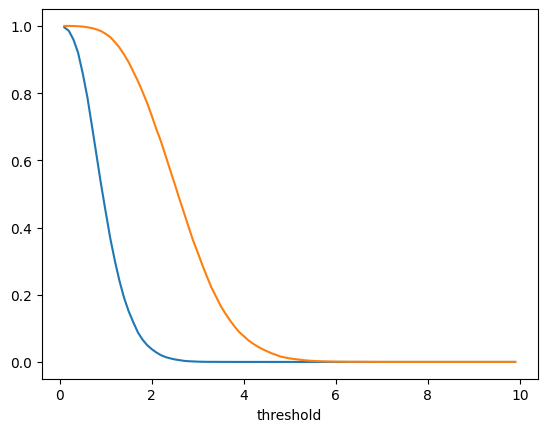

In [8]:
flip_flop_index_proportion_exceeding(fcst1, "lead_day", np.arange(0.1, 10, 0.1)).plot()
flip_flop_index_proportion_exceeding(fcst2, "lead_day", np.arange(0.1, 10, 0.1)).plot()

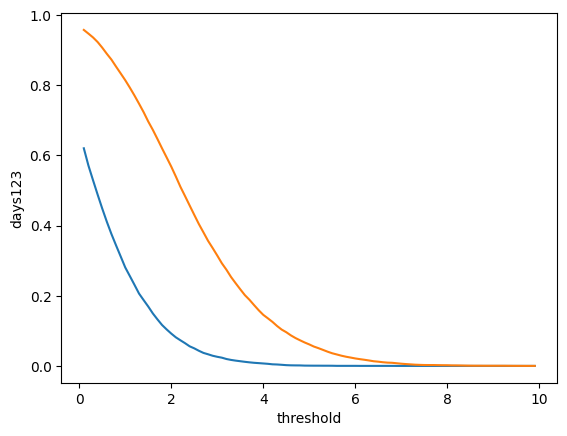

In [9]:
flip_flop_index_proportion_exceeding(fcst1, "lead_day", np.arange(0.1, 10, 0.1), days123=[1, 2, 3]).days123.plot()
flip_flop_index_proportion_exceeding(fcst2, "lead_day", np.arange(0.1, 10, 0.1), days123=[1, 2, 3]).days123.plot()